## Final Project PIC 16A Winter 2022: Clustering Penguins

**Team Members**
- Akshat Srivastav
- James West

**Statement of Contribution**

**Akshat**: Wrote underlying class definitions and function implementation for `PenguinsData`, `PenguinClassifier`, `plot_decision_region()`.

**James**: Worked on creating the demo file, Git repo, and adding exception-handling to the class definitions.

### Introduction to the Project

James and I chose our project idea from the pre-approved project ideas and decided to work with the `Clustering Penguins` project. The entire project specification can be found in this [link](https://www.philchodrow.com/PIC16A/project/). To summarize the goal of this project, we want to figure out a Machine Learning model that can help us classify a Penguin into a *Species* based on certain measurements. 

This document serves as both the demo file and the final notebook that we want to submit. Throughout the notebook, we will walk you through the methods that we have implemented and illustrate examples of ML pipelines and handling examples. 

**Important Download Instructions**

- As you read through this document, make sure to run all the code cells and download the `palmer_penguins.csv` file from the [GitHub link](https://github.com/akshat-sriv/Pic16A_Final_Project) to the same file directory as this `.ipynb` file. 

- Also accompanying this notebook is the `final_project_custom_class.py` file, which can also be found on the GitHub link and needs to be downloaded to the same file directory as this file for the code to run. 

**Structure**

This demo file is roughly divided into the following sections.

1. *EDA*: This section is where we will carry out our Exploratory Data Analysis. We introduce our dataset and probe it further for relations and correlations amongst the feature and target variables. We also present instances of where we might need to clean up some data and introduce the functionalities of the custom class that we have built. Finally, we will select the three features (1 qualitative, 2 quantitative) that we base our model on. 

2. *Model Fitting*: In this section, we will fit three different classification algorithms on our data: Logistic Regression, Decision Tree and Support Vector Machine. We will evaluate the performance of these models on the training and test set. We will also consider the cross-validation score in selecting the best model.

3. *Conclusion*: TADA! We have chosen our best model and will consider points where our model appears to fail. 

### EDA: Exploratory Data Analysis

As we begin exploring our data, it might be a good idea to introduce our dataset that we are using. For training and evaluating our models, we will use the *Palmer Penguins data set*, which is collected by [Dr.Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) and the [Palmer Station,Antarctica LTER](https://pallter.marine.rutgers.edu/) as a part of the Long Term Ecological Research Network. The dataset consists of measurements for thre different penguin species:
1. Chinstrap
2. Gentoo
3. Adelie

To read in the dataset and produce visualizations, we have created a `PenguinsData` class which a bunch of instance methods that we will explore below. It is through these instance methods that we can visualize our data! Before we go any further, we must import the `PenguinsData` class from the `custom_class.py` file. 

In [2]:
# import PenguinsData class from custom_class.py
from final_project_custom_class import PenguinsData

In [3]:
# initialize the Penguins object 
# Penguins is an instance of PenguinsData
Penguins = PenguinsData('palmer_penguins.csv')

In the code cell above, we have essentially intialized an instance of the `PenguinsData` class. Notice that while initializing this object, we must pass the name of the file `palmer_penguins.csv`. Under the hood, the `Penguins` object has an attribute called `df` that stores the csv file as a `pandas DataFrame` using the `pd.read_csv()` method. In the code cell below, we can have a look at the data frame that stores the dataset, using the `show_df()` instance method.

In [4]:
Penguins.show_df()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


From the output above, we can see the dataset that has been loaded into a data frame. More importantly, the columns of the dataset tell us the different measurements that were taken for these penguins. The column names `Sample Number`, `Stage`, `Individual ID`, `Clutch Completion`, `Date Egg`, and `Comments` are quite redundant measurements that do not really tell us much about the species of the penguin. The essential features that we want to focus on are listed below. 

1. Species: this is our **target** variable and has three categories Chinstrap, Gentoo, and Adelie.
2. Island: denotes which of the three islands Dream, Torgersen, or Biscoe the penguin belonged to.
3. Culmen Length (mm)
4. Culmen Depth (mm)
5. Flipper Length (mm)
6. Body Mass (g)
7. Sex
8. Delta 15 N (o/oo): measures the concentration of Nitrogen isotopes in blood.
9. Delta 13 C (o/oo): measures the concentration of Carbon isotopes in blood.	

Notice in the data frame above that the `Species` column contains the long scientific name identifying the species of the individual penguin. For instance, notice the first row in the `Species` column is called `Adelie Penguin (Pygoscelis adeliae)`. Instead of dealing with such a long name, we just want the short name, `Adelie`, `Chinstrap`, and `Gentoo`. To clean this up, our `PenguinsData` object has an instance method called `clean_species_column()` that will basically use split the string into `['Adelie', 'Penguin', '(Pygoscelis', 'adeliae)']` and extract the first element, i.e. `'Adelie'`. This is done using `.str.split().get(0)` applied on the `df` attribute of the `Penguins` instance.

In [5]:
Penguins.clean_species_column()

Now that we have cleaned up our `Species` column, we want to start investigating the dataset even further. Perhaps, we can start of by looking at how the average `Culmen Length (mm)`, `Culmen Depth (mm)`, and `Body Mass (g)` differs across the species. To create the summary table below, the `PenguinsData` class has an instance method called `.create_summary_table(group_cols, value_cols)` that takes in as arguments the columns that you want to **group by** and those whose values you want to investigate. Since, we want to analyze the mean `Culmen Length (mm)`, `Culmen Depth (mm)`, and `Body Mass (g)` across the species, we pass in the appropriate arguments and use the instance method to get the output below.

In [6]:
Penguins.create_summary_table(['Species'], ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Body Mass (g)'])

,Culmen Length (mm),Culmen Depth (mm),Body Mass (g)
Species,,,
Adelie,38.791391,18.346358,3700.662252
Chinstrap,48.833824,18.420588,3733.088235
Gentoo,47.504878,14.982114,5076.016260


**Analyzing the table above**

- *Culmen Length (mm)* From the table above, it appears that the mean `Culmen Length (mm)` changes quite significantly between the `Adelie` and `Chinstrap` species, i.e. from `38.79 mm` to `48.83 mm` respectively. However, note that the mean `Culmen Length (mm)` between the `Chinstrap` and `Gentoo` species is not so much different, if you compare `48.83 mm` and `47.50 mm` respectively.

- *Culmen Depth (mm)* Notice in table above that the average`Culmen Depth (mm)` does not change remarkably between the `Adelie` and `Chinstrap` species, comparing `18.35 mm` and `18.42 mm`. However, it does change quite remarkably between the `Chinstrap` and `Gentoo` species as the `Chinstrap` species have an average `Culmen Depth (mm)` of `18.42 mm` while the `Gentoo` species have an average of `14.98 mm`.

- *Body Mass (g)* Both the `Adelie` and `Chinstrap` species have quite a similar average `Body Mass (g)` of `3700.66 g` and `3733.09 g` respectively. However, the `Gentoo` species has quite a different mean body mass of `5076.02 g`. 

All three of these variables appear to be quite informative about the species of the penguin, but only when combined with one another. This is because, the `Culmen Length`, for instance, can only tell us the difference between the `Adelie` and `Chinstrap` species but it cannot really segregate the `Chinstrap` and `Gentoo` species. 

Perhaps, we can look at scatterplots later. Next we investigate how the average levels of the Carbon and Nitrogen isotopes vary across the different species. 

In [7]:
Penguins.create_summary_table(['Species'],
                              ['Delta 15 N (o/oo)',
                               'Delta 13 C (o/oo)'])

,Delta 15 N (o/oo),Delta 13 C (o/oo)
Species,,
Adelie,8.859733,-25.804194
Chinstrap,9.356155,-24.546542
Gentoo,8.245338,-26.185298


**A few notes on the table above**

- From the table above it appears that the average `Delta 15 N (o/oo)` and `Delta 13 C (o/oo)` do not vary significantly across the different species. They do not seem too important as predictor variables that can help us classify our species. 

In the next code cell, we will show you the first instance of **handling exceptions**. If we were to pass an invalid column name such as `'Secies'` into the `create_summary_table` method, we would encounter `KeyError` because the column name `'Secies'` does not exist in the data frame. To handle this exception, our code uses a `try-except` statement in the instance method definition (see the `.py` file). In the case of such an exception, our program simply outputs an error message and returns a `KeyError` object. 

In [8]:
Penguins.create_summary_table(['Spcies'], 
                              ['Delta 15 N (o/oo)',
                               'Delta 13 C (o/oo)'])

KeyError: caused due to invalid column name.


KeyError('Spcies')

**Investigating the distribution of species for each island**

There are three unique islands from where data on the penguins was collected.

1. `Biscoe`
2. `Dream`
3. `Torgersen`

The unique values are given below using the `show_unique_values()` instance method. We see that value counts for each of the `Island` values. Now we want to examine how the population distribution of these penguins varies across the islands. To visualize this we have defined an instance method called `species_island_prop()` and `island_dist_bar_plot()` that will create a summary table and bar plot respectively.

In [9]:
Penguins.show_unique_values(['Island'])

Island   
Biscoe       168
Dream        124
Torgersen     52
dtype: int64

In [10]:
Penguins.species_island_prop()

,Island,Species,Percentage
0,Biscoe,Gentoo,73.81
1,Biscoe,Adelie,26.19
2,Dream,Chinstrap,54.84
3,Dream,Adelie,45.16
4,Torgersen,Adelie,100.00


**Analyzing the summary table above**

In the summary table above, we try to examine the percentage composition of different species in each island.

- Biscoe: The `Biscoe` island appears to be home to only the `Gentoo` and `Adelie` species with `73.81%` of the population belonging to the `Gentoo` species and `26.19%` of the population belonging to the `Adelie` species.

- Dream: The `Dream` island appears to be home to only the `Chinstrap` and `Adelie` species. Here the population seems more evenely split as `54.84%` of the population belongs to the `Chinstrap` species and `45.16%` of the populatoin belongs to the `Adelie` species. 

- Torgersen: On this island, we only find the `Adelie` species that compose a `100%` of the population on `Torgersen`.

The barchart below corroborates our findings from the summary table. 

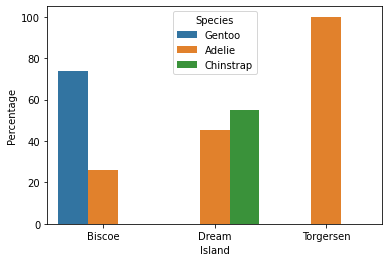

In [11]:
Penguins.island_dist_bar_plot();

**How does the body mass of these species vary across the islands?**

To see how the quantitative variable `Body Mass (g)` varies across the islands, we will be using the `box_plots(quant_var, hue=None)` instance method from the `PenguinsData` class. Here, the `quant_var` is the variable that we want to investigate across all of the islands and `hue` refers to the `variable_name` that we can split the box plots on. The box plots can show us how the distribution of `Body Mass (g)` varies across the islands for each of these species. 

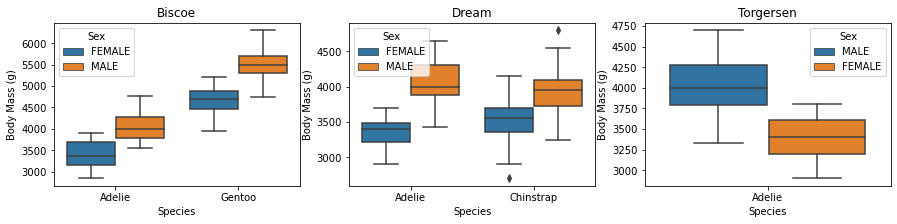

In [12]:
Penguins.box_plots('Body Mass (g)', hue='Sex')

In the boxplot **above** we see how the distribution of the `Body Mass (g)` varies across the islands for each species and both sexes `MALE` and `FEMALE`. In each of the islands and species, we find that the `MALE` species have typically a higher body mass in grams. Also, the `Adelie` species across all `Biscoe`, `Dream`, and `Torgersen` have roughly the same distribution of `Body Mass (g)` in both the male and female sexes.

In the boxplot **below**, we remove the `hue` variable and only visualize the `Body Mass (g)` distribution for each of the species across the different islands. Notice that in the `Biscoe` island, the distributions of `Body Mass (g)` in the `Adelie` and `Gentoo` species vary quite significantly. However, the `Dream` and `Torgersen` islands do not help us much. On the `Dream` island both the `Adelie` and `Chinstrap` species have quite a similar distribution. Overall, the `Body Mass (g)` does not seem to be very helpful in differntiating between the species.

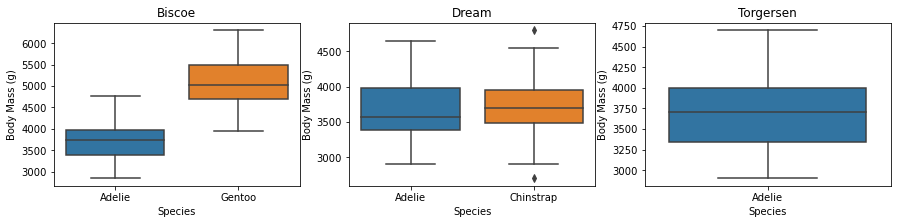

In [13]:
Penguins.box_plots('Body Mass (g)')

**Second Instance of exception handling**

What happens if we pass in an invalid column name such as `Boy Mass (g)` in the `.box_plots()` method? Normally, we would run into a `ValueError` but using the `try-except` clause in the `.py` file helps us evade this error and have our code run. Look below for the error message and the `ValueError` object.

ValueError: Perhaps, quant_var is not a valid column name.


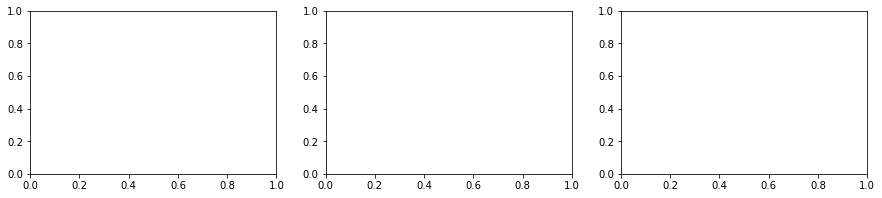

In [14]:
Penguins.box_plots('Bod Mass (g)')

**How do the Culmen Length and Culmen Depth change across the islands?**

From the first summary table in this notebook, we noticed that the average `Culmen Length (mm)` and the `Culmen Depth (mm)` together told us a lot about the species of a penguin. However, now we want to see how these variables vary across the different islands for each of the three species. To achieve this, we will plot a scatter plot using the instance method `scatter_plot(x, y, cols=None, hue=None)` that under the hood actually calls the `sns.relplot()` function from `seaborn` that creates a `FacetGrid`.

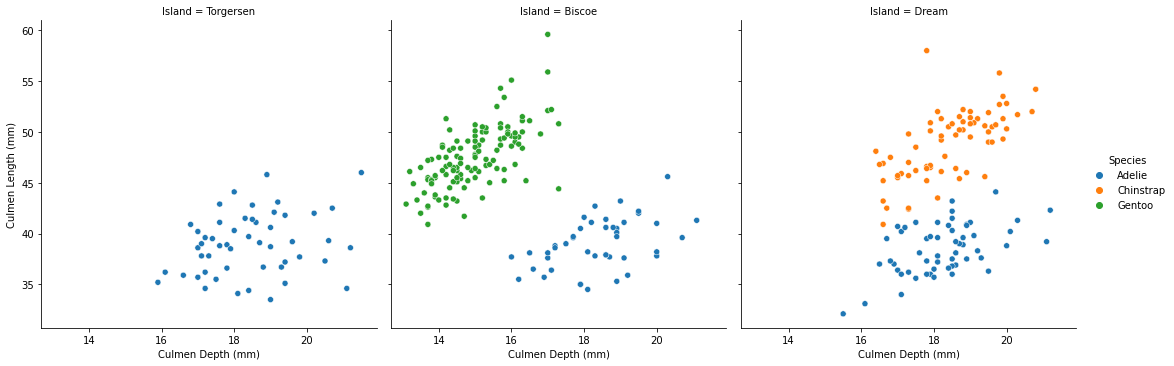

In [15]:
Penguins.scatter_plot(x='Culmen Depth (mm)', y='Culmen Length (mm)',
                      cols='Island', hue='Species');

From the scatterplot above, we see that in every island, for every species there appears to be a positive correlation between the `Culmen Length` and `Culmen Depth`. Also notice that in the `Biscoe` and `Dream` islands, the scatterplot points can be separated into well-defined clusters based on their species. In the `Dream` island for instance, the penguins appear to have a similar `Culmen Depth (mm)` but the `Chinstrap` species tend to havea higher `Culmen Length (mm)`.

**Let's simplify our question**

*How do these two variables vary across the species, regardless of the island?* To visualize this, we get rid of the `cols` argument in the `scatter_plot` instance method. Below we see that the scatterplot points are almost perfectly segregated into three clusters representing the three different species. 

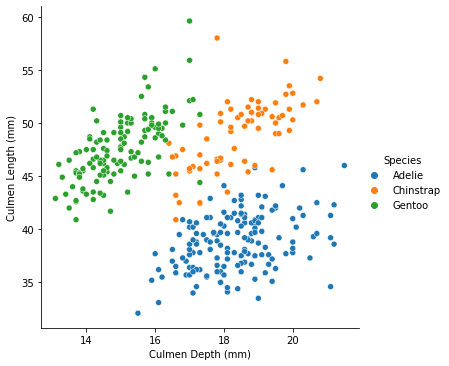

In [16]:
Penguins.scatter_plot(x='Culmen Depth (mm)', y ='Culmen Length (mm)',
                      hue='Species');

**Finally Choosing our Features**

After all of the EDA that we have done, we must choose 1 qualitative variable and 2 quantitative variables as our predictors. From our visualizations above, it seems that the `Culmen Length` and `Culmen Depth` can be pretty useful because of the clusters of data we saw in the scatterplot. From the barchart representing the population distributions, it appears that the `Island` also matters a lot because the population distribution changes significantly across these islands and is very polarized.

Hence, our three features that we will use to build our final model on are given below.

1. `Culmen Length (mm)`
2. `Culmen Depth (mm)`
3. `Island`

### Model Fitting

- Now that we have decided the features that we want to use as predictors for fitting our model, it is time we begin fitting our models. In this project we will consider three ML models `Logistic Regression`, `Decision Tree`, and `Support Vector Machine`. 

- However, to fit these models, we have created another custom class called the `PenguinClassifier` is initialized with the following arguments. 
    1. PenguinsData object such as the `Penguins` instance in the section below.
    2. features: this is a list of features that we will be using as our predictor variables.
    3. target: this is the target variable that we want to predict.
    4. model: this is an instance of the sklearn model that we are trying to fit.
    
- After passing in these arguments, the `PenguinClassifier` object will create its own attributes that it needs to fit an ML model which are. 
    1. X created by accessing only the predictor features from the data frame in the `Penguins` instance
    2. y created by accessing the `target` variable from the data frame in the `Penguins` instance
    3. model
    4. X_train, y_train, X_test, y_test   
    
We will begin with fitting the `Logistic Regression` model, but before doing so we must import the `PenguinClassifier` class from `custom_class.py`.

In [17]:
from final_project_custom_class import PenguinClassifier

### Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression 
## code above, we import the LogisticRegression model from sklearn.linear_model

## here we specify a list of features we use as predictors
features = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Island']

## specify target variables
target = 'Species'

## instantiate object from LogisticRegression class
## set high value for max_iter
lr = LogisticRegression(max_iter=1000)

## instantiate object from PenguinClassifier
pc = PenguinClassifier(Penguins, features, target, lr)

Since we want to fit a `LogisticRegression` model onto our data in the data frame, we instantiate an object from the `PenguinClassifier` class and call it `pc`. We pass `Penguins`, `features`, `target`, and `lr` (which is the logistic regression model) as arguments. Essentially, using the `features` argument, under the hood, we can access these columns from the `df` DataFrame attribute in `Penguins` and set it to `X`. We do something similar for `y`. We can also have a look at the `X` data frame and the `y` series in the two code cells to follow. 

In [19]:
pc.show_X() ## shows us the X data frame

,Culmen Length (mm),Culmen Depth (mm),Island
0,39.1,18.7,Torgersen
1,39.5,17.4,Torgersen
2,40.3,18.0,Torgersen
4,36.7,19.3,Torgersen
5,39.3,20.6,Torgersen


In [20]:
pc.show_y() ## only shows first 6 values

0    Adelie
1    Adelie
2    Adelie
4    Adelie
5    Adelie
6    Adelie
Name: Species, dtype: object

**Data Cleaning**

Note that under the hood our class has already removed all the `null` values from the data. However, the categorical variables such as `Island` and `Species` need to be encoded as numbers. This can be done using the `LabelEncoder` class from `sklearn.preprocessing`. To abstract all of this work, we implemented an instance method called `encode_data()` that does this for us.

In [21]:
## encoding our data using encode_data()
pc.encode_data()

## to confirm our results we will check X and y
pc.show_X()

,Culmen Length (mm),Culmen Depth (mm),Island
0,39.1,18.7,2
1,39.5,17.4,2
2,40.3,18.0,2
4,36.7,19.3,2
5,39.3,20.6,2


In [22]:
## want to check encode_data worked for y
pc.show_y()

array([0, 0, 0, 0, 0, 0])

It seems like our `encode_data` has done a good job at encoding our variables as numbers. We can now begin fitting our `LogisticRegression` model onto our data, but before we do so, we must split our data.

To fit our model, we can use the `fit_model()` instance method. This method will basically train the `model` attribute of the `PenguinsClassifier` object on the training data and return a dictionary containing the `fit_model`, `train_score`, and `test_score`.

In [23]:
pc.split_data() ## splits X,y into X_train, X_test, y_train, y_test
fit_model = pc.fit_model() ## fit model using fit_model() instance method
fit_model

{'model_instance': LogisticRegression(max_iter=1000),
 'fit_model': LogisticRegression(max_iter=1000),
 'train_score': 0.989010989010989,
 'test_score': 0.9565217391304348}

From our code cell above, it seems like the `Logistic Regression` model does pretty well with a test score of 0.97 as compared to a training score of almost 0.99. Achieving a 97% accuracy on our test set means that our model has done a great job at generalizing over to the test data. However cross validation will provide a better insight into the true accuracy of our model and how it can generalize on unseen data. We compute the `cross validation` score using an instance method called `cv_scores(cv=5)` that uses the `cross_val_score` method from `sklearn.model_selection`. By default, it computes a 5-fold `cross validation` score which can be changed using the `cv` argument.

In [24]:
## compute the cross validation score using built cv_scores instant method
pc.cv_scores()

0.9816835016835016

With such a high cv-score given above, we can visualize the confusion matrix below to see the few instances where our model went wrong.

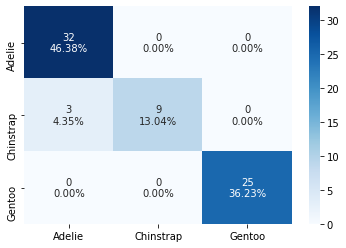

In [25]:
pc.plot_confusion_matrix();

From the confusion matrix above, we have a very low misclassification rate. The diagonal entries represent the number of accurate predictions that are made by the model which are very high, supported by the high accuracy rate of the Logistic Regression model.

**Plotting the decision region**

In [26]:
from final_project_custom_class import plot_decision_region

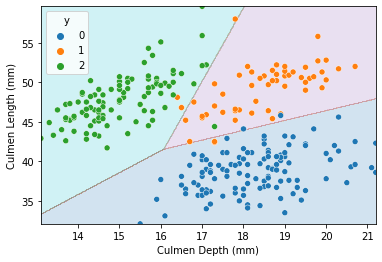

In [27]:
plot_decision_region(pc)

**How do we plot a decision region?**

Notice that the plot above only has two axes `Culmen Length (mm)` and `Culmen Depth (mm)` on the vertical and horizontal axes respectively. To plot the decision region, we imported a custom-made function called `plot_decision_region(PenguinsClassifier)` that takes a `PenguinsClassifier` object as an argument and uses the `model` attribute to figure out the decision boundaries. 

A penguin with a `Culmen Length (mm)` of about `40 mm` and `Culmen Depth (mm)` of `14 mm` would be classified as a `Gentoo` which is represented by the green dots.

**Third example of exception handling**

Notice that in this instance of `PenguinsClassifier` we used a `LogisticRegression` model as an argument while initializing the `pc` instance. This was done by intializing `lr = LogisticRegression(max_iter=1000)`. However, if by mistake we initialized `lr` to another object, i.e. not a valid `sklearn` model, fitting our model might give us an error. However, because of the `exception-handling` implemented within my instance methods through `try-except` statements, the code continues to run without haulting the program. 

In [28]:
## wrongly instantiate lr as a string 'LogisticRegression()'
lr = 'LogisticRegression()'

## here we specify a list of features we use as predictors
features = ['Culmen Length (mm)', 'Culmen Depth (mm)',
            'Island']

## specify target variables
target = 'Species'


pc_exception_handling = PenguinClassifier(Penguins, features, target, lr)
pc_exception_handling.encode_data()
pc_exception_handling.split_data()
pc_exception_handling.fit_model()

AttributeError: Make sure that the model argument you passed is a valid sklearn model object.


AttributeError("'str' object has no attribute 'fit'")

Instead of haulting the code due to the invalid model `lr` which is just a string, our code just prints out an informative error message and returns an `AttributeError` object.

### Support Vector Machines

From looking at the decision boundary for `logistic regression`, it appears that the decision boundaries are roughly linear. It would hence make sense to use a `Support Vector Machine` with a linear kernel. 

In [45]:
## import the LinearSVC from sklearn
from sklearn.svm import LinearSVC

## instantiate object form LinearSVC() class
linear_svc = LinearSVC(max_iter=10000)

## define features we will use as predictors
features = ['Culmen Length (mm)', 'Culmen Depth (mm)',
            'Island']

## define the target variable
target = 'Species'

## initialize PenguinClassifier object
pc_lsvc = PenguinClassifier(Penguins, features, target, linear_svc)

In [46]:
pc_lsvc.show_X()

,Culmen Length (mm),Culmen Depth (mm),Island
0,39.1,18.7,Torgersen
1,39.5,17.4,Torgersen
2,40.3,18.0,Torgersen
4,36.7,19.3,Torgersen
5,39.3,20.6,Torgersen


In [47]:
pc_lsvc.show_y()

0    Adelie
1    Adelie
2    Adelie
4    Adelie
5    Adelie
6    Adelie
Name: Species, dtype: object

In [48]:
## seems like we need to encode our qualitative features
pc_lsvc.encode_data()

pc_lsvc.show_X()

,Culmen Length (mm),Culmen Depth (mm),Island
0,39.1,18.7,2
1,39.5,17.4,2
2,40.3,18.0,2
4,36.7,19.3,2
5,39.3,20.6,2


In [49]:
pc_lsvc.show_y()

array([0, 0, 0, 0, 0, 0])

In [50]:
## after encoding our data
## we must now split our data before we can fit a model
pc_lsvc.split_data() ## split data into train-test

## we can fit the model using .fit_model() instance method
lsvc_fit_model = pc_lsvc.fit_model()
lsvc_fit_model

C:\Users\aksha\.anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


{'model_instance': LinearSVC(max_iter=10000),
 'fit_model': LinearSVC(max_iter=10000),
 'train_score': 0.9816849816849816,
 'test_score': 0.9855072463768116}

It appears that our Linear SVC gives us a very similar test accuracy to the logistic regression model that we used in the previous section. We will now proceed to look at the 5-fold cross validation score. 

In [54]:
pc_lsvc.cv_scores(cv=5)

C:\Users\aksha\.anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\aksha\.anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\aksha\.anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\aksha\.anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\aksha\.anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

0.978047138047138

With such a high cross validation score, the linear support vector classifier does seem to generalize very well over unseen data. However, it appears that the logistic regression model has a better cv score which suggests that maybe the logistic regression model is better than a linear `SVC`. Perhaps we should visualize the confusion matrix and the decision region of the linear `SVC` to get more insight.

<AxesSubplot:>

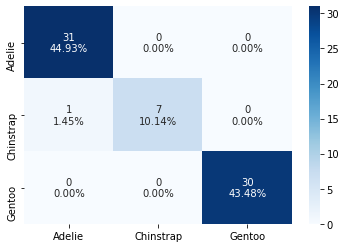

In [55]:
## confusion matrix
pc_lsvc.plot_confusion_matrix()

C:\Users\aksha\.anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


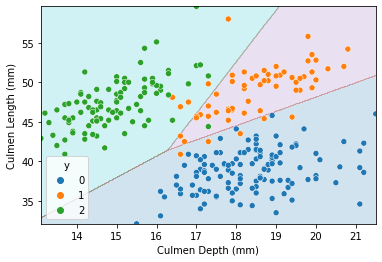

In [56]:
## decision boundary
plot_decision_region(pc_lsvc)

The confusion matrix does not really tell us much about why the `SVC` is slightly suboptimal in comparison to the `LogisticRegression` model, because most non diagonal entries are very small, indicating that the model has a very low misclassification rate. Looking at the **decision boundary** however tells us that the decision boundaries are slightly more inaccurate because a lot of the orange data points fall outside the edge. This means that a few Chinstrap (number 1) penguins are misclassified by the `SVC` model.

### Decision Trees/ Random Forest

Decision Trees can quite often be prone to overfitting and to avoid that we use a `Random Forest` classifier that uses *bagging* to reduce overfitting. A random forest is essentially an *ensemble* method that has many decision trees and takes an 'average' of the outputs of all the trees. 

When initializing our `RandomForest` we will leave all of the arguments to their default values and will use the same worflow as we did for `LogisticRegression` and the linear `SVC`.

In [57]:
## import the RandomForestClassifier from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

## instantiate the RandomForestClassifier object
rf = RandomForestClassifier()

## define features we will use as predictors
features = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Island']

## define the target variable
target = 'Species'

## initialize PenguinClassifier object
pc_rf = PenguinClassifier(Penguins, features, target, rf)

In [58]:
## we look at X and y 
pc_rf.show_X()

,Culmen Length (mm),Culmen Depth (mm),Island
0,39.1,18.7,Torgersen
1,39.5,17.4,Torgersen
2,40.3,18.0,Torgersen
4,36.7,19.3,Torgersen
5,39.3,20.6,Torgersen


In [59]:
pc_rf.show_y()

0    Adelie
1    Adelie
2    Adelie
4    Adelie
5    Adelie
6    Adelie
Name: Species, dtype: object

In [60]:
## we must encode our categorical data
pc_rf.encode_data()
pc_rf.show_X()

,Culmen Length (mm),Culmen Depth (mm),Island
0,39.1,18.7,2
1,39.5,17.4,2
2,40.3,18.0,2
4,36.7,19.3,2
5,39.3,20.6,2


In [61]:
## want to check if y is also encoded
pc_rf.show_y()

array([0, 0, 0, 0, 0, 0])

In [73]:
## after encoding our data
## we must now split our data before we can fit a model
pc_rf.split_data() ## split data into train-test

## we can fit the model using .fit_model() instance method
rf_fit_model = pc_rf.fit_model()
rf_fit_model

{'model_instance': RandomForestClassifier(),
 'fit_model': RandomForestClassifier(),
 'train_score': 1.0,
 'test_score': 0.9710144927536232}

If we compare our training score of 1.0 to our test score of 0.97, it seems like our `RandomForest` model is slightly overfitting. This is because we obtain a training accuracy of `1.0`, i.e. `100%` but when the `RandomForest` model encounters unseen training data, its accuracy drops. Hence, the `RandomForest` model does not seem to do a great job at generalizing over unseen data.

Let's look at the cross validation score to get a better idea about our model's ability to generalize on unseen data.

In [79]:
pc_rf.cv_scores()

0.9853198653198654

So far, `RandomForest` seems to have the highest 5-fold cross validation score compared to `LogisticRegression` and linear `SVC`. We will proceed to look at the confusion matrix and decision region to learn more about potential overfitting.

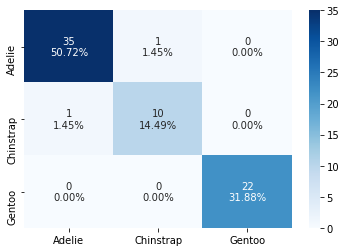

In [82]:
## confusion matrix
pc_rf.plot_confusion_matrix();

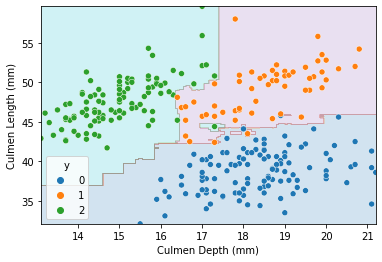

In [83]:
## decision region
plot_decision_region(pc_rf)

From the plot above, it seems like the decision boundaries are more accomodative to noise and almost perfectly capture all of the data points within a certain region. Perhaps, these more accomodative decision boundaries can explain why our `RandomForest` model slightly overfits the data because the decision boundaries also try to accomodate the noise within the dataset.  

### Conclusion

**Congratulations!!!** You have made it to the end of this long demo file. After analyzing all of our models that use `Culmen Length (mm)`, `Culmen Depth (mm)`, and `Island` features to classify penguins, the `LogisticRegression` model seems to do the best job because of its optimal `bias-variance` tradeoff. The `LogisticRegression` model has the most similar training and test score compared to all other models and has a relatively high cross validation score too. The `SVC` model has a slightly lower cross validation score whereas the `RandomForest` model seems to be overfitting our data. 

Hence, the `LogisticRegression` model does the best job at generalizing on our data given the linear decision boundaries.